In [43]:
import pandas_datareader as pdr

In [44]:
!pip install tiingo

In [45]:
# Import necessary libraries
from tiingo import TiingoClient
import pandas as pd

# Set up the Tiingo client configuration
config = {
    'session': True,
    'api_key': ""
}

# Initialize the Tiingo client
client = TiingoClient(config)
start_date = '2000-01-01'
end_date = '2024-03-31'

# Fetch historical data for AAPL
# Specify the ticker symbol, start date, and end date
ticker = 'AAPL'
historical_prices = client.get_dataframe(
    ticker,
    start_date,
    end_date,
    frequency='daily'
)

# Display the first few rows of the dataframe
print(historical_prices.head())

# Optionally, you can save the dataframe to a CSV file
historical_prices.to_csv('AAPL_data.csv', index=True)


                            close    high     low    open   volume  adjClose  \
date                                                                           
2000-01-03 00:00:00+00:00  111.94  112.50  101.69  104.87  4783900  0.844915   
2000-01-04 00:00:00+00:00  102.50  110.62  101.19  108.25  4574800  0.773663   
2000-01-05 00:00:00+00:00  104.00  110.56  103.00  103.75  6949300  0.784985   
2000-01-06 00:00:00+00:00   95.00  107.00   95.00  106.12  6856900  0.717054   
2000-01-07 00:00:00+00:00   99.50  101.00   95.50   96.50  4113700  0.751019   

                            adjHigh    adjLow   adjOpen  adjVolume  divCash  \
date                                                                          
2000-01-03 00:00:00+00:00  0.849142  0.767549  0.791552  535797335      0.0   
2000-01-04 00:00:00+00:00  0.834952  0.763775  0.817064  512378112      0.0   
2000-01-05 00:00:00+00:00  0.834499  0.777437  0.783098  778322378      0.0   
2000-01-06 00:00:00+00:00  0.807629  0.71705

In [46]:
df = pd.read_csv('AAPL_data.csv')

In [47]:
df.shape

(6098, 13)

In [48]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2000-01-03 00:00:00+00:00,111.94,112.50,101.69,104.87,4783900,0.844915,0.849142,0.767549,0.791552,535797335,0.0,1.0
1,2000-01-04 00:00:00+00:00,102.50,110.62,101.19,108.25,4574800,0.773663,0.834952,0.763775,0.817064,512378112,0.0,1.0
2,2000-01-05 00:00:00+00:00,104.00,110.56,103.00,103.75,6949300,0.784985,0.834499,0.777437,0.783098,778322378,0.0,1.0
3,2000-01-06 00:00:00+00:00,95.00,107.00,95.00,106.12,6856900,0.717054,0.807629,0.717054,0.800987,767973567,0.0,1.0
4,2000-01-07 00:00:00+00:00,99.50,101.00,95.50,96.50,4113700,0.751019,0.762341,0.720827,0.728375,460734860,0.0,1.0


In [49]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
6093,2024-03-22 00:00:00+00:00,172.28,173.05,170.06,171.760,71160138,172.045030,172.813980,169.828058,171.525739,71160138,0.0,1.0
6094,2024-03-25 00:00:00+00:00,170.85,171.94,169.45,170.565,54288328,170.616980,171.705494,169.218890,170.332369,54288328,0.0,1.0
6095,2024-03-26 00:00:00+00:00,169.71,171.42,169.58,170.000,57388449,169.478535,171.186203,169.348712,169.768140,57388449,0.0,1.0
6096,2024-03-27 00:00:00+00:00,173.31,173.60,170.11,170.410,60273265,173.073625,173.363230,169.877990,170.177580,60273265,0.0,1.0
6097,2024-03-28 00:00:00+00:00,171.48,172.23,170.51,171.750,65672690,171.246121,171.995098,170.277444,171.515753,65672690,0.0,1.0


In [50]:
df1 = df.reset_index()['close']

In [51]:
df1.shape

(6098,)

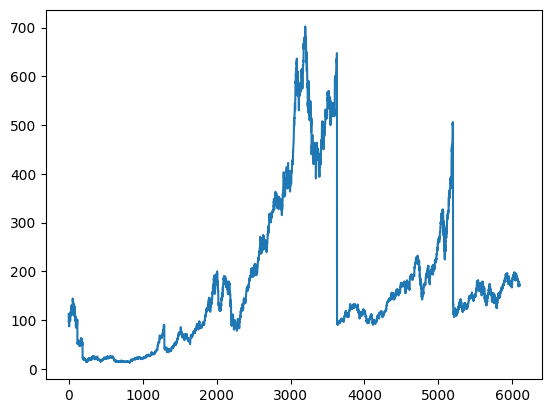

In [52]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [53]:
#Since LSTM is sensitive to data scale we standardize it using MinMax scaler
import numpy as np

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
df1.shape

(6098, 1)

In [56]:
df1

array([[0.14342942],
       [0.129728  ],
       [0.13190514],
       ...,
       [0.22727801],
       [0.23250312],
       [0.22984702]])

Cross validation and random seed methods for splitting datasets work well with regression or classification problems. However in case of time series dataset, we should try to divide the dataset inot training and testing datasets until a certain point in time

In [57]:
#Splitting into training and testing dataset
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [58]:
training_size, test_size

(3963, 2135)

In [59]:
import numpy

# Function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    # Initialize empty lists to store the input (dataX) and output (dataY) data
    dataX, dataY = [], []

    # Loop through the dataset, excluding the last 'time_step' elements
    for i in range(len(dataset)-time_step-1):
        # Extract a subset of the dataset, starting from the current index 'i'
        # and ending at 'i + time_step' (exclusive)
        a = dataset[i:(i+time_step), 0]

        # Append this subset to the input data list (dataX)
        dataX.append(a)

        # Append the value at the next time step (i + time_step) as the output (dataY)
        dataY.append(dataset[i + time_step, 0])

    # Convert the lists to numpy arrays and return them
    return numpy.array(dataX), numpy.array(dataY)

In [60]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [61]:
print(X_train.shape), print(y_train.shape)

(3862, 100)
(3862,)


(None, None)

Creating a stacked LSTM model

Before creating any LSTM on a data, we need to reshape the data into a 3 dimensional data

In [62]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [63]:
#Creating LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:
# Create a sequential neural network model
model = Sequential()

# Add an LSTM layer with 50 units, returning sequences, and input shape (100,1)
# This layer processes sequences of 100 time steps, with 1 feature per time step
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))

# Add another LSTM layer with 50 units, returning sequences
# This layer processes the output sequences from the previous layer
model.add(LSTM(50, return_sequences=True))

# Add a final LSTM layer with 50 units, not returning sequences
# This layer produces a single output value
model.add(LSTM(50))

# Add a dense output layer with a single unit
# This layer produces the final output value
model.add(Dense(1))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, verbose=1)

Epoch 1/30
61/61 [==============================] - 7s 44ms/step - loss: 0.0113 - val_loss: 0.0014
Epoch 2/30
61/61 [==============================] - 1s 19ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/30
61/61 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/30
61/61 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/30
61/61 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 9.4168e-04
Epoch 6/30
61/61 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 8.6253e-04
Epoch 7/30
61/61 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 7.8273e-04
Epoch 8/30
61/61 [==============================] - 1s 19ms/step - loss: 9.3698e-04 - val_loss: 7.3089e-04
Epoch 9/30
61/61 [==============================] - 1s 19ms/step - loss: 9.9423e-04 - val_loss: 0.0011
Epoch 10/30
61/61 [==============================] - 1s 19ms/step - loss: 9.6031e-04 

In [67]:
#Predicting and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

64/64 [==============================] - 0s 6ms/step


In [68]:
#Transforming back to original state
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [69]:
#Calculating metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

251.26711790364658

In [70]:
math.sqrt(mean_squared_error(y_test, test_predict))

183.1003980663006

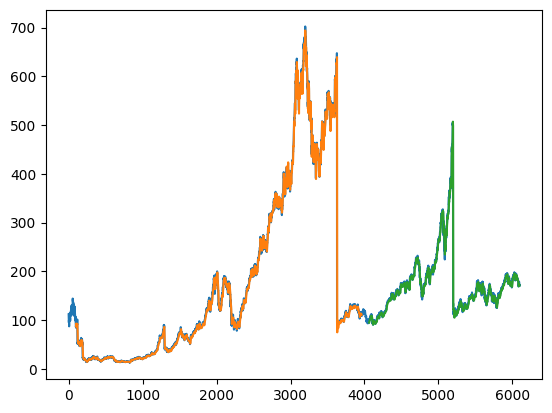

In [71]:
# Plotting

# Set the look-back window for plotting
look_back = 100

# Create a plot array for training predictions
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan  # Initialize with NaN values

# Fill the plot array with training predictions, shifted by the look-back window
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Create a plot array for test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan  # Initialize with NaN values

# Fill the plot array with test predictions, shifted by the look-back window and the length of the training predictions
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot the baseline (original data) and predictions
plt.plot(scaler.inverse_transform(df1))  # Plot the original data
plt.plot(trainPredictPlot)  # Plot training predictions
plt.plot(testPredictPlot)  # Plot test predictions
plt.show()  # Display the plot

In [72]:
import tensorflow as tf

In [73]:
tf.__version__

'2.15.0'

In [74]:
len(test_data)

2135

In [75]:
#Predicting and checking performance
x_input = test_data[2035:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [77]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [78]:
# Demonstrate prediction for next 10 days

# Import the necessary library
from numpy import array

# Initialize an empty list to store the output
lst_output = []

# Set the number of steps for the input sequence
n_steps = 100

# Initialize a counter
i = 0

# Loop until we have predicted for 30 days
while (i < 30):
    # Check if the input sequence has more than 100 values
    if (len(temp_input) > 100):
        # Extract the last 100 values as the input sequence
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        # Reshape the input sequence for the model
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # Print the input sequence
        print(x_input)
        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        # Append the prediction to the input sequence
        temp_input.extend(yhat[0].tolist())
        # Remove the first value from the input sequence
        temp_input = temp_input[1:]
        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())
        # Increment the counter
        i = i + 1
    else:
        # Reshape the input sequence for the model
        x_input = x_input.reshape((1, n_steps, 1))
        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        # Append the prediction to the input sequence
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())
        # Increment the counter
        i = i + 1

# Print the final output list
print(lst_output)

[0.22793606]
101
1 day input [0.24109553 0.24485471 0.24640773 0.24571105 0.25150222 0.24917995
 0.2530117  0.25383901 0.25630642 0.2562774  0.2588319  0.25765625
 0.2586287  0.25668379 0.25642254 0.2573079  0.25581294 0.25665477
 0.2585271  0.25590003 0.2616912  0.26009463 0.2629249  0.26501495
 0.26134285 0.26356353 0.26828065 0.26849836 0.26771459 0.26527621
 0.2668002  0.2637377  0.26351999 0.26195245 0.26115417 0.26129931
 0.26192342 0.26039943 0.25039914 0.24838167 0.24498534 0.2439258
 0.25028303 0.24967343 0.25119742 0.25032657 0.25080554 0.24748178
 0.24610293 0.25473889 0.25899155 0.26237336 0.2642457  0.26325873
 0.26277976 0.26023977 0.25923829 0.25388255 0.24859938 0.25216987
 0.25070394 0.25336004 0.25571134 0.255871   0.25428895 0.2550582
 0.25259079 0.24952829 0.24823652 0.24781561 0.24556591 0.24447734
 0.24558042 0.24855584 0.24587071 0.24389677 0.24603036 0.24427414
 0.24330169 0.24171964 0.23510116 0.22787309 0.22642167 0.2262475
 0.22875845 0.23169032 0.23238701 0.

In [79]:
import matplotlib.pyplot as plt

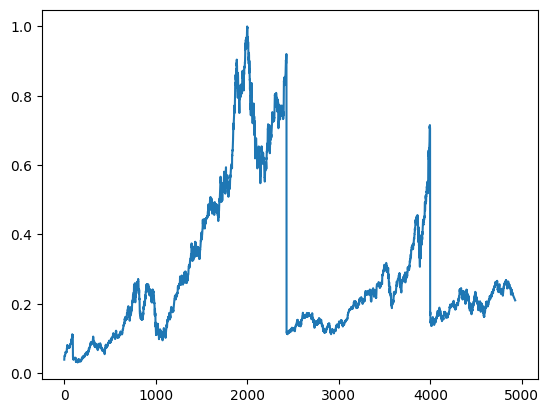

In [80]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])